<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/Marginal_Revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture 

!pip install jaxopt

In [2]:
import jax 
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp 
import jaxopt 
import matplotlib.pyplot as plt 

In [3]:
def demand(p):
  return 12 - p**0.7 

In [4]:
ps = jnp.linspace(0, 10, 100)
qs = jax.vmap(demand)(ps)

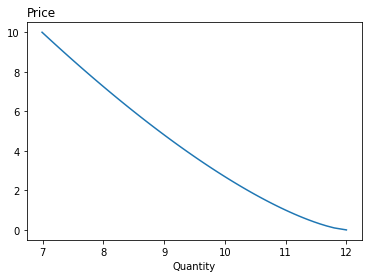

In [5]:
plt.plot(qs, ps)
plt.title('Price', loc='left')
plt.xlabel('Quantity')
plt.show()

In [26]:
def inverse(f):

  def wrapper(q):
    
    def closure(p, q):
      return (f(p)-q)**2

    solver = jaxopt.GradientDescent(fun=closure, maxiter=2000)
    res = solver.run(8., q)
    return res.params

  return wrapper 

In [27]:
demand(inverse(demand)(6.))

DeviceArray(5.9999511, dtype=float64, weak_type=True)

In [28]:
revenue = lambda q: inverse(demand)(q)*q

In [29]:
marginal_revenue = jax.grad(revenue)

In [30]:
jax.grad(inverse(demand))(8.)

DeviceArray(-2.58743863, dtype=float64)